# 0.0 Imports

In [110]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings( 'ignore' )

# 0.1 Load Data

In [111]:
df_raw = pd.read_csv('datasets/df_ready.csv')

In [112]:
df_raw = df_raw.drop(columns=['Unnamed: 0', 'Date_imp', 'Cluster', 'condition','currency', 'imageURLs','shipping', 'sourceURLs', 'weight', 'Date_imp_d.1','Zscore_1','price_std'])

In [113]:
df_raw.head(1)

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50


# 0.2 Rename Columns

In [114]:
df_raw.columns = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

# 1.0 Descrição dos Dados

In [115]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [116]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 23151
Number of columns: 20


## 1.2 Data Dtypes

In [117]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.3 Check NA

In [118]:
df1.isna().sum()
#Não tem muito NA nas colunas que iremos usar

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.4 Change Data Dtypes

In [119]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.5 Descriptive Statistics

In [120]:
num_att = df1.select_dtypes(include = ['float64','int64'])
cat_att = df1.select_dtypes(exclude = ['float64','int64','datetime64[ns]'])

## 1.5.1 Numerical attributes

In [121]:
#central tendency
ct1 = pd.DataFrame(num_att.apply(np.mean)).T #média
ct2 = pd.DataFrame(num_att.apply(np.median)).T #mediana

#dispersion
d1 = pd.DataFrame(num_att.apply(np.std)).T #desvio padrão
d2 = pd.DataFrame(num_att.apply(np.min)).T #min
d3 = pd.DataFrame(num_att.apply(np.max)).T #max
d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T #range
d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T #skew
d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T #kurtosis

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m

,att,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 EDA

In [122]:
df2 = df1.copy()

In [123]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.1 Qual merchant mais vendeu?

,merchant,date_imp
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


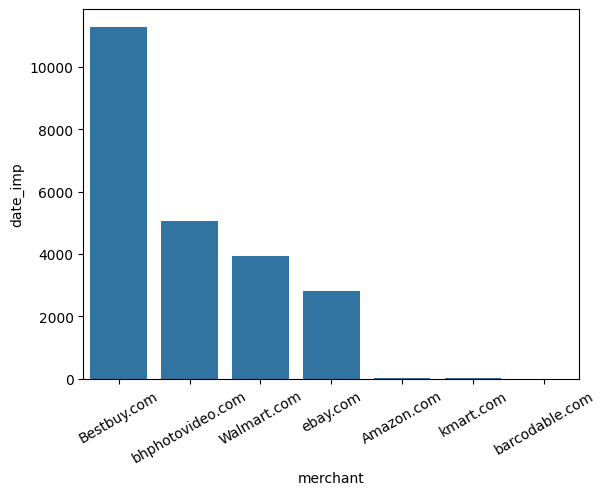

In [124]:
aux1 = df2[['date_imp','merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp',data=aux1);
aux1

In [125]:
#seleção de lojas
df_best = df2.loc[df2['merchant'] == 'Bestbuy.com',:]
df_bhp = df2.loc[df2['merchant'] == 'bhphotovideo.com',:]
df_walmart = df2.loc[df2['merchant'] == 'Walmart.com',:]
df_ebay = df2.loc[df2['merchant'] == 'ebay.com',:]

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

,category_name,date_imp
57,"tv, television, video",2130
27,"laptop, computer",1715
50,"speaker, portable, bluetooth",1104
5,"camera, mirrorless, photo",1072
9,"car, speaker, subwoofer",865


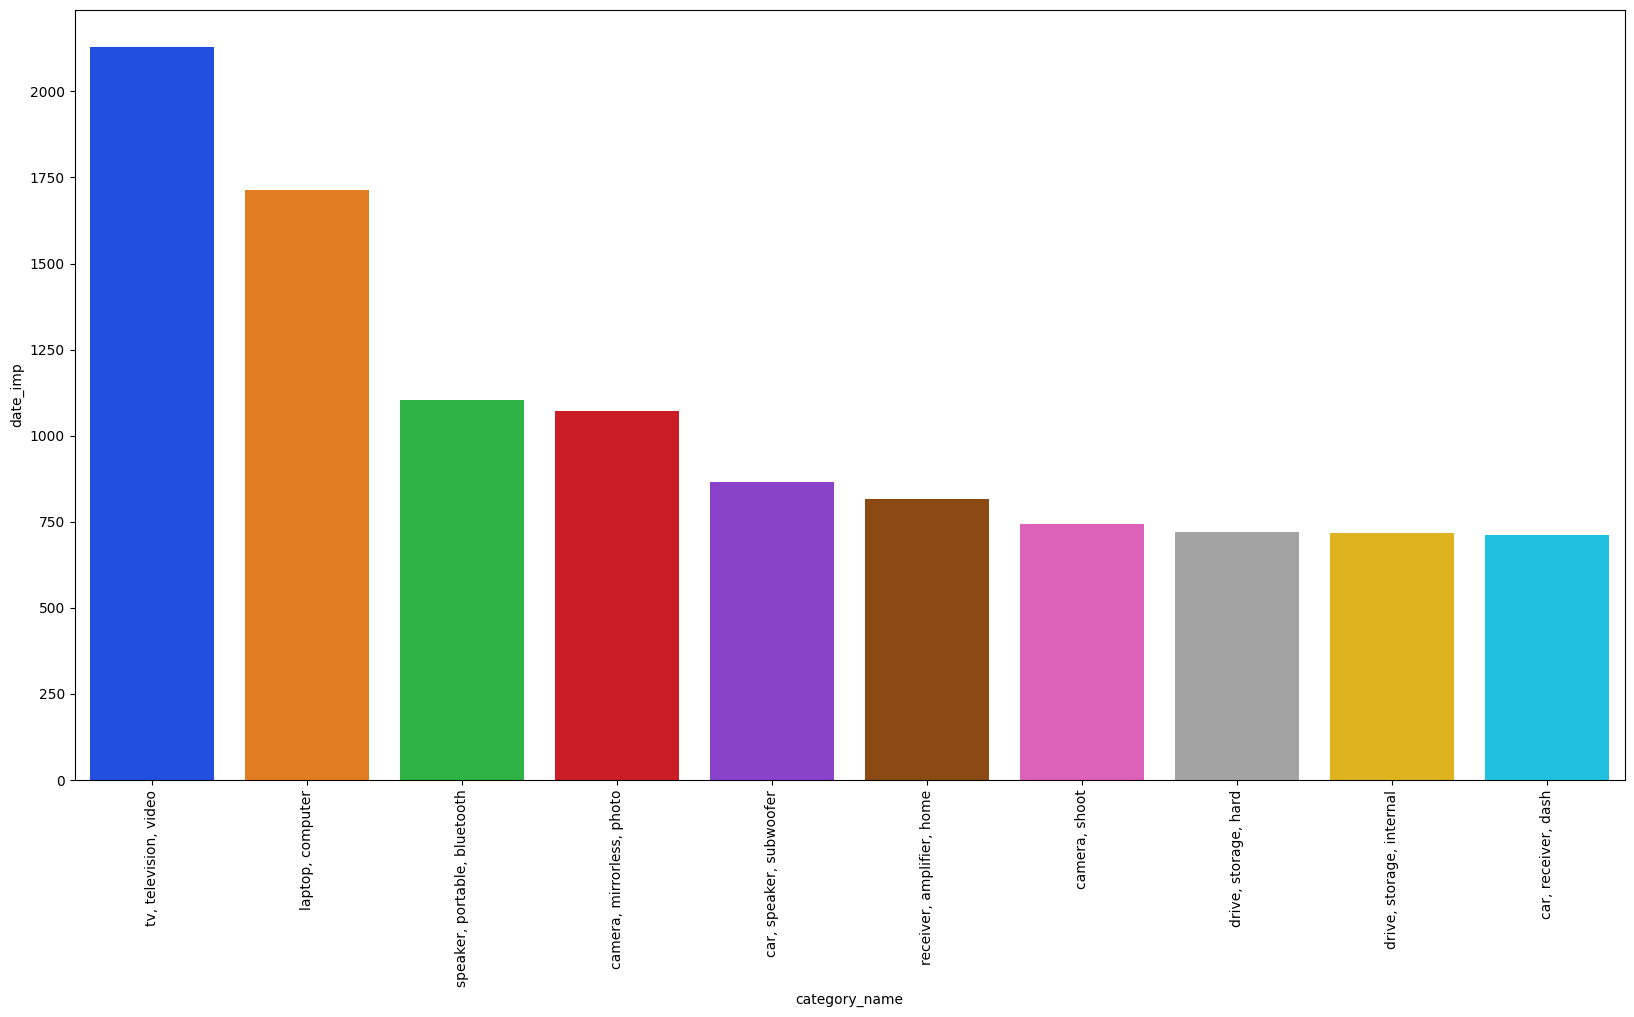

In [126]:
aux2 = df2[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='category_name', y='date_imp',data=aux2.head(10),palette='bright');
plt.xticks(rotation=90);

aux2.head()

### 2.2.2 Categorias mais vendidas por loja

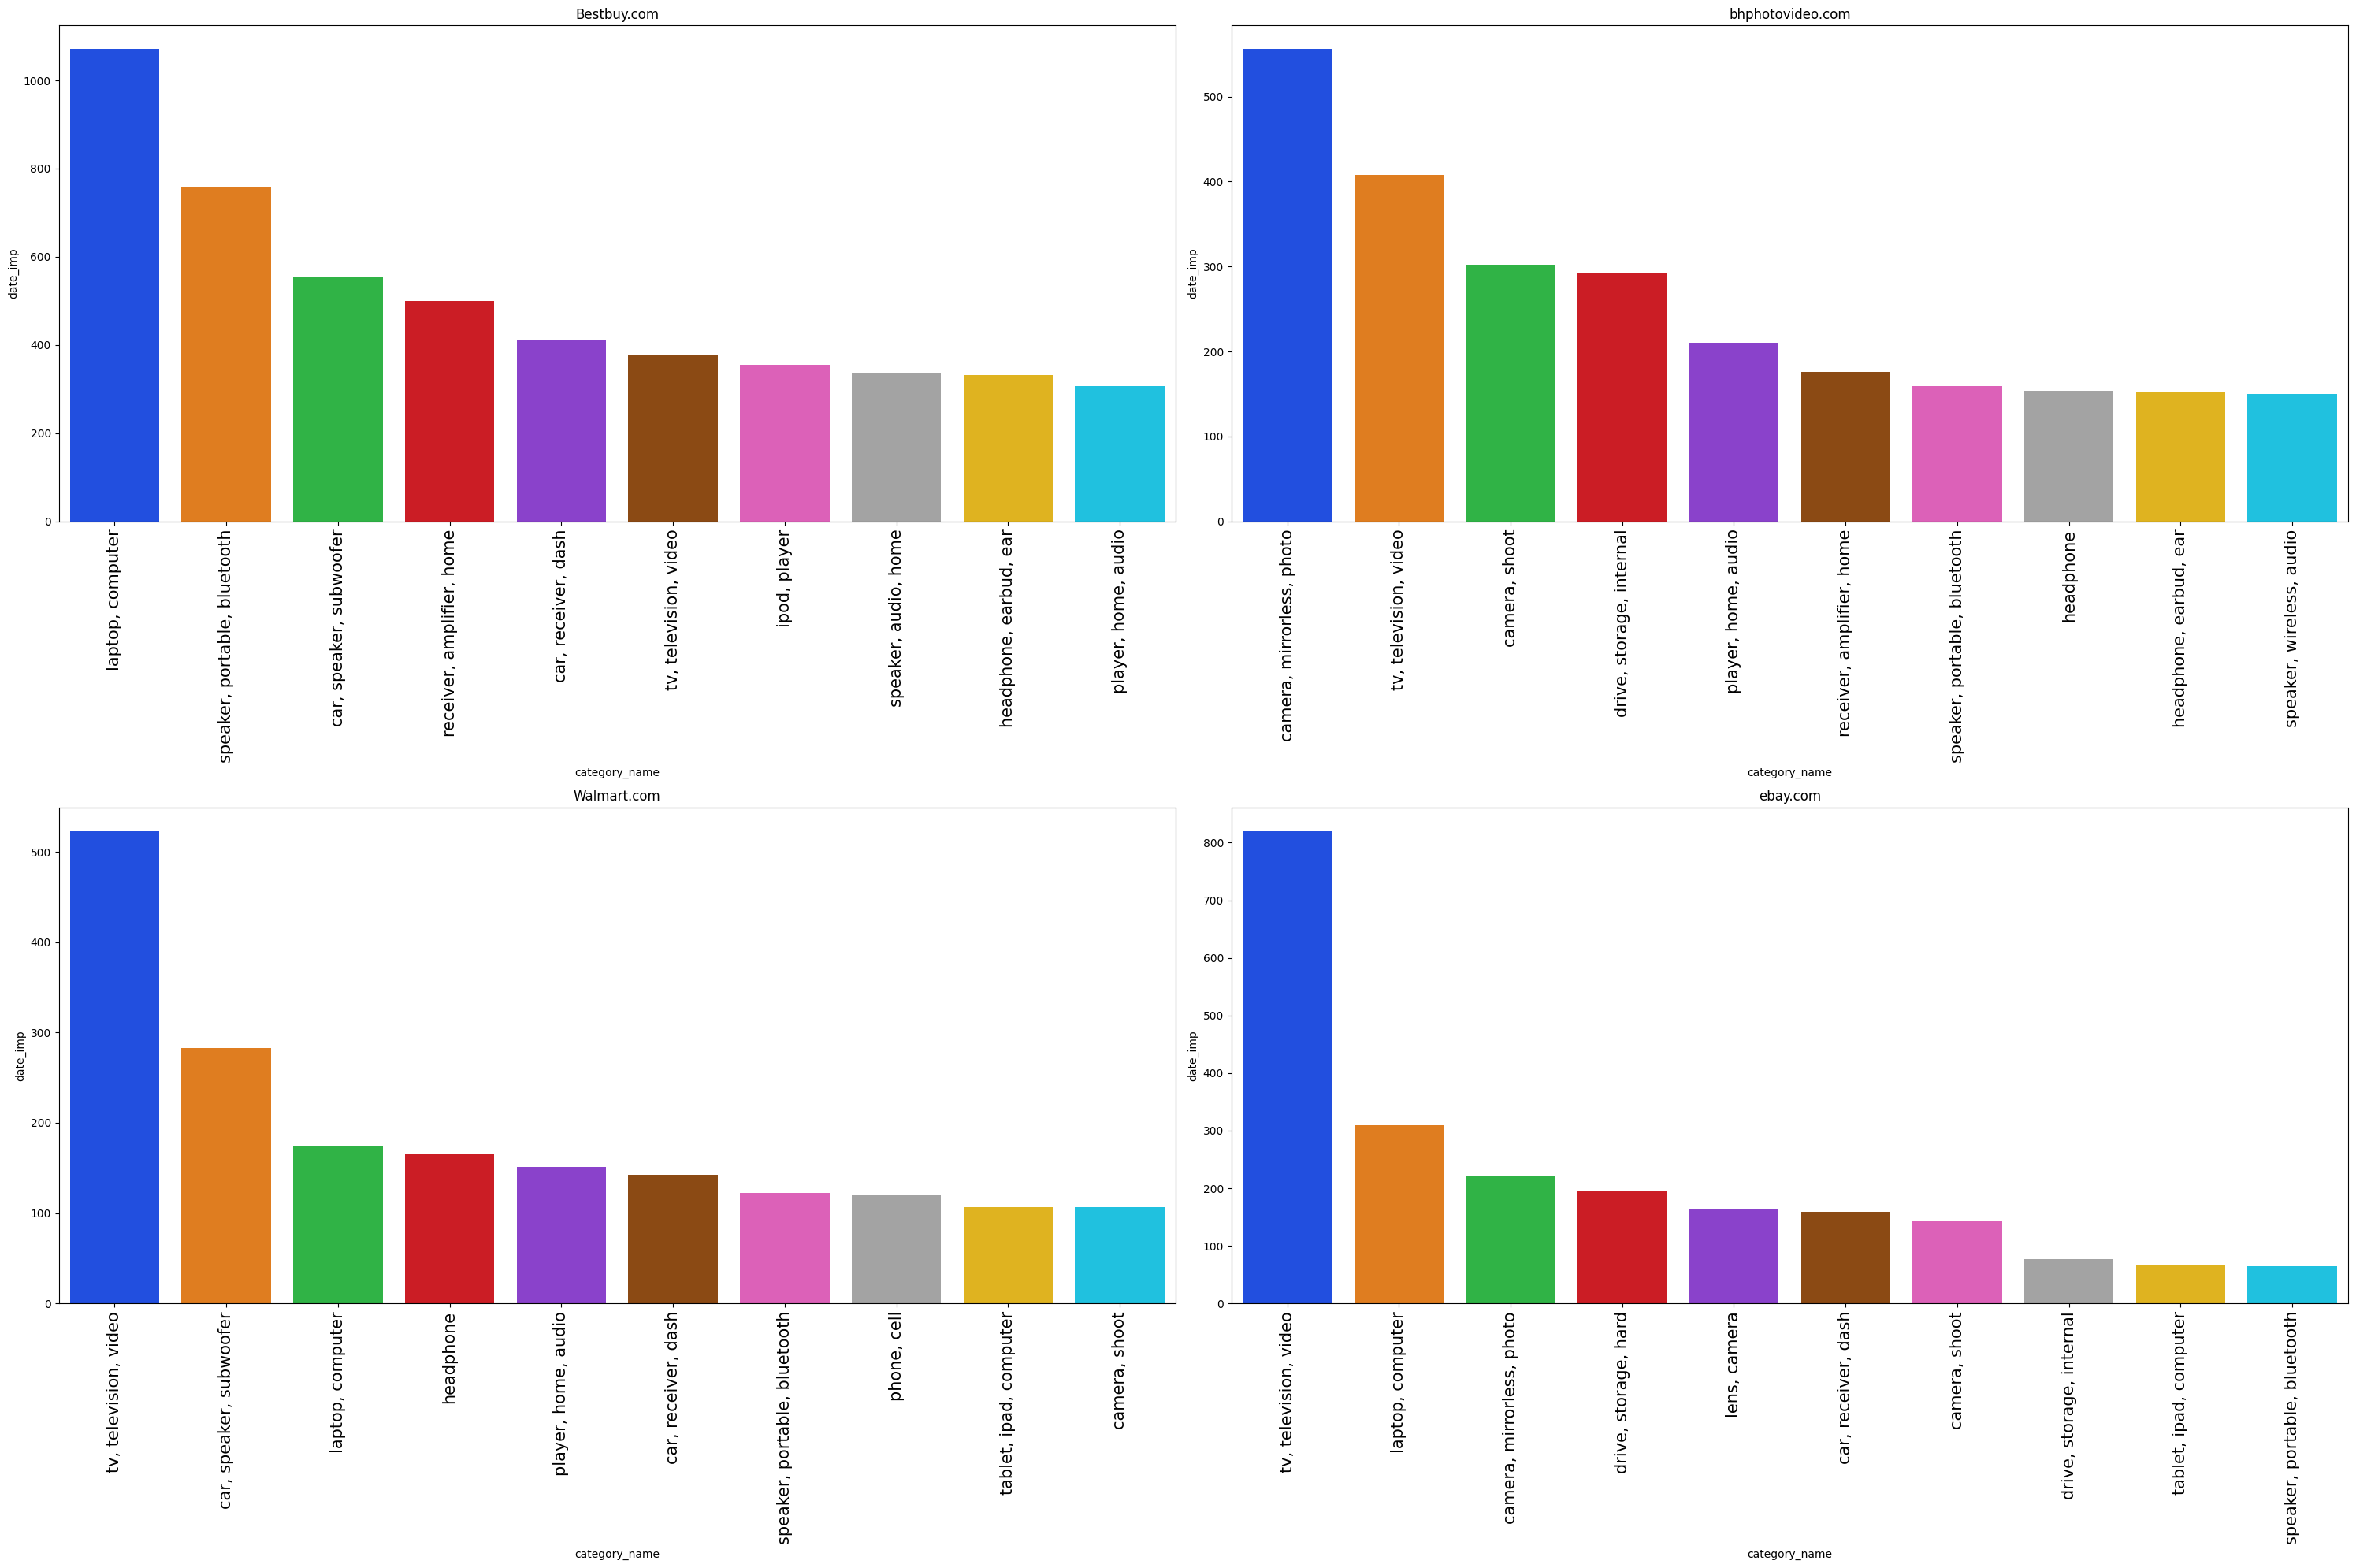

In [127]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux3 = df_best[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux3.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux4.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,3)
aux5 = df_walmart[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux5.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,4)
aux6 = df_ebay[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux6.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=15);

plt.tight_layout();

## 2.3 Qual marca mais vendida?

### 2.3.1 Marcas mais vendidas no geral

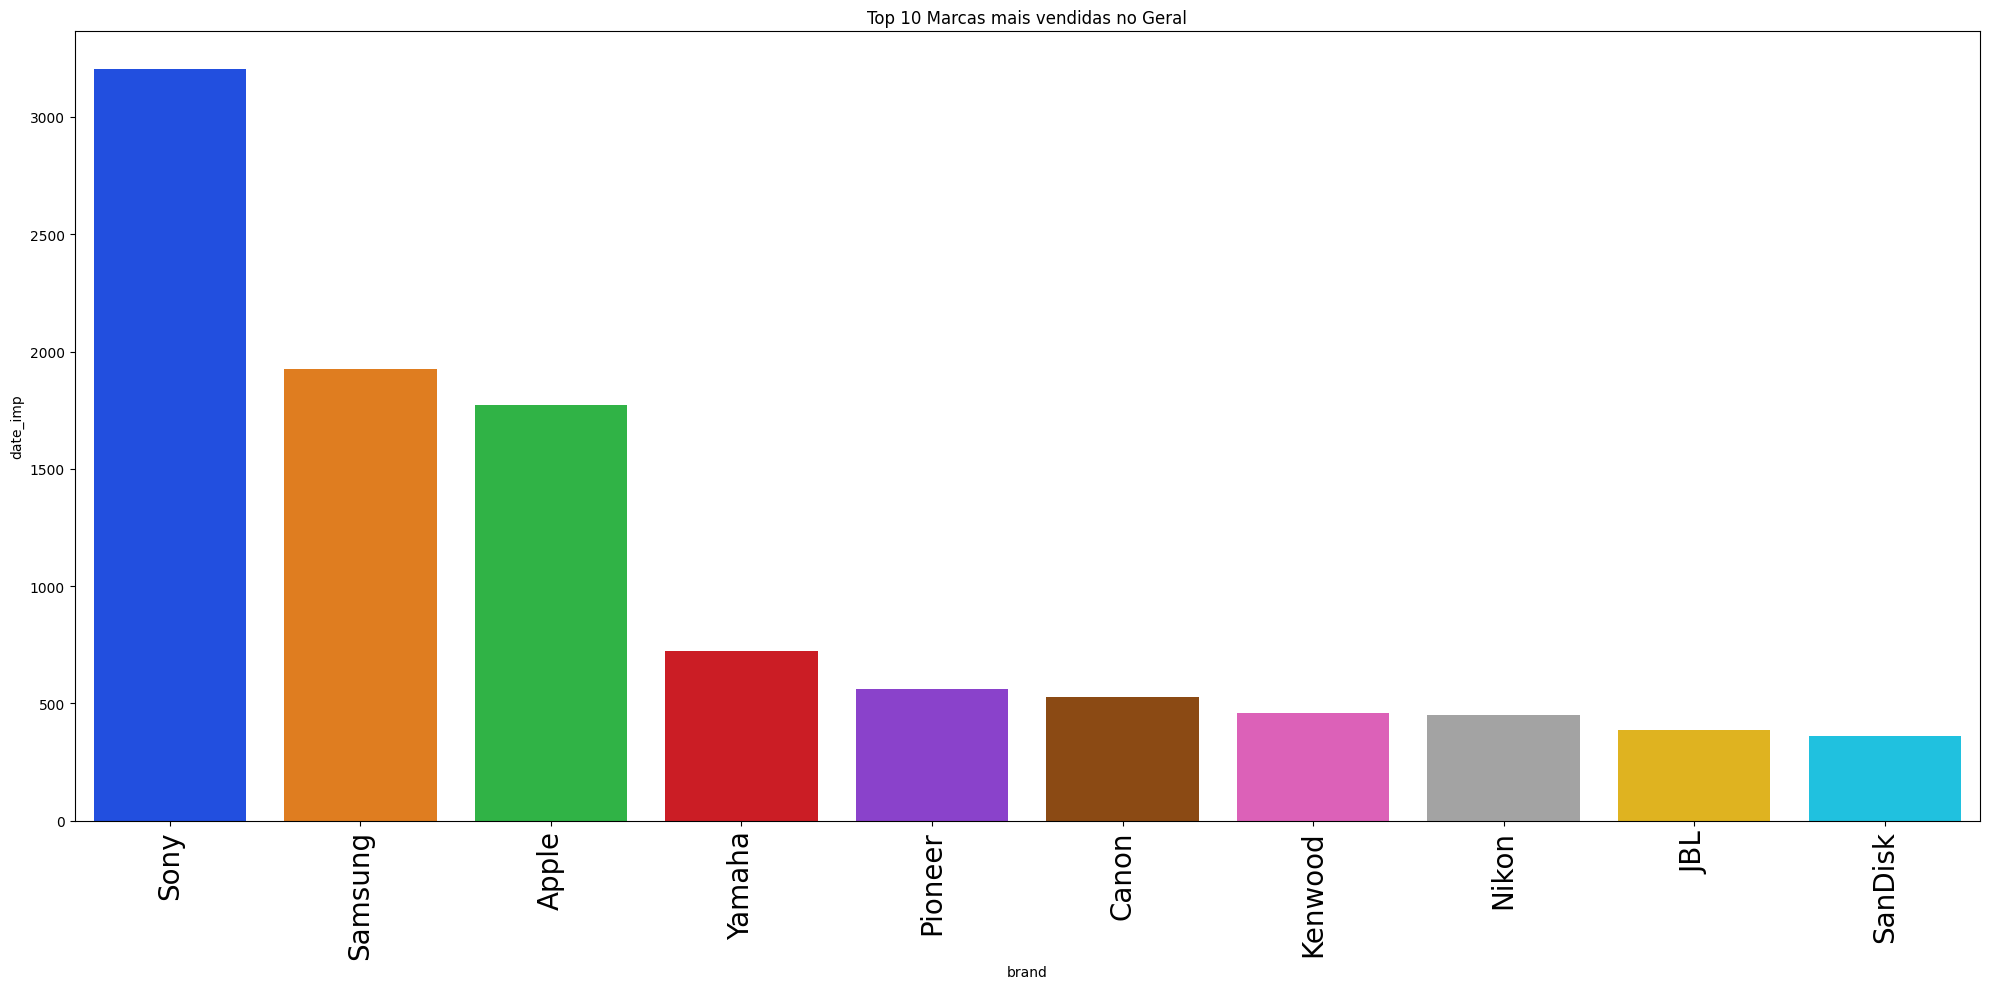

In [128]:
aux7 = df2[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Marcas mais vendidas no Geral');
sns.barplot(x='brand', y='date_imp',data=aux7.head(10),palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.3.1 Marcas mais vendidas por loja

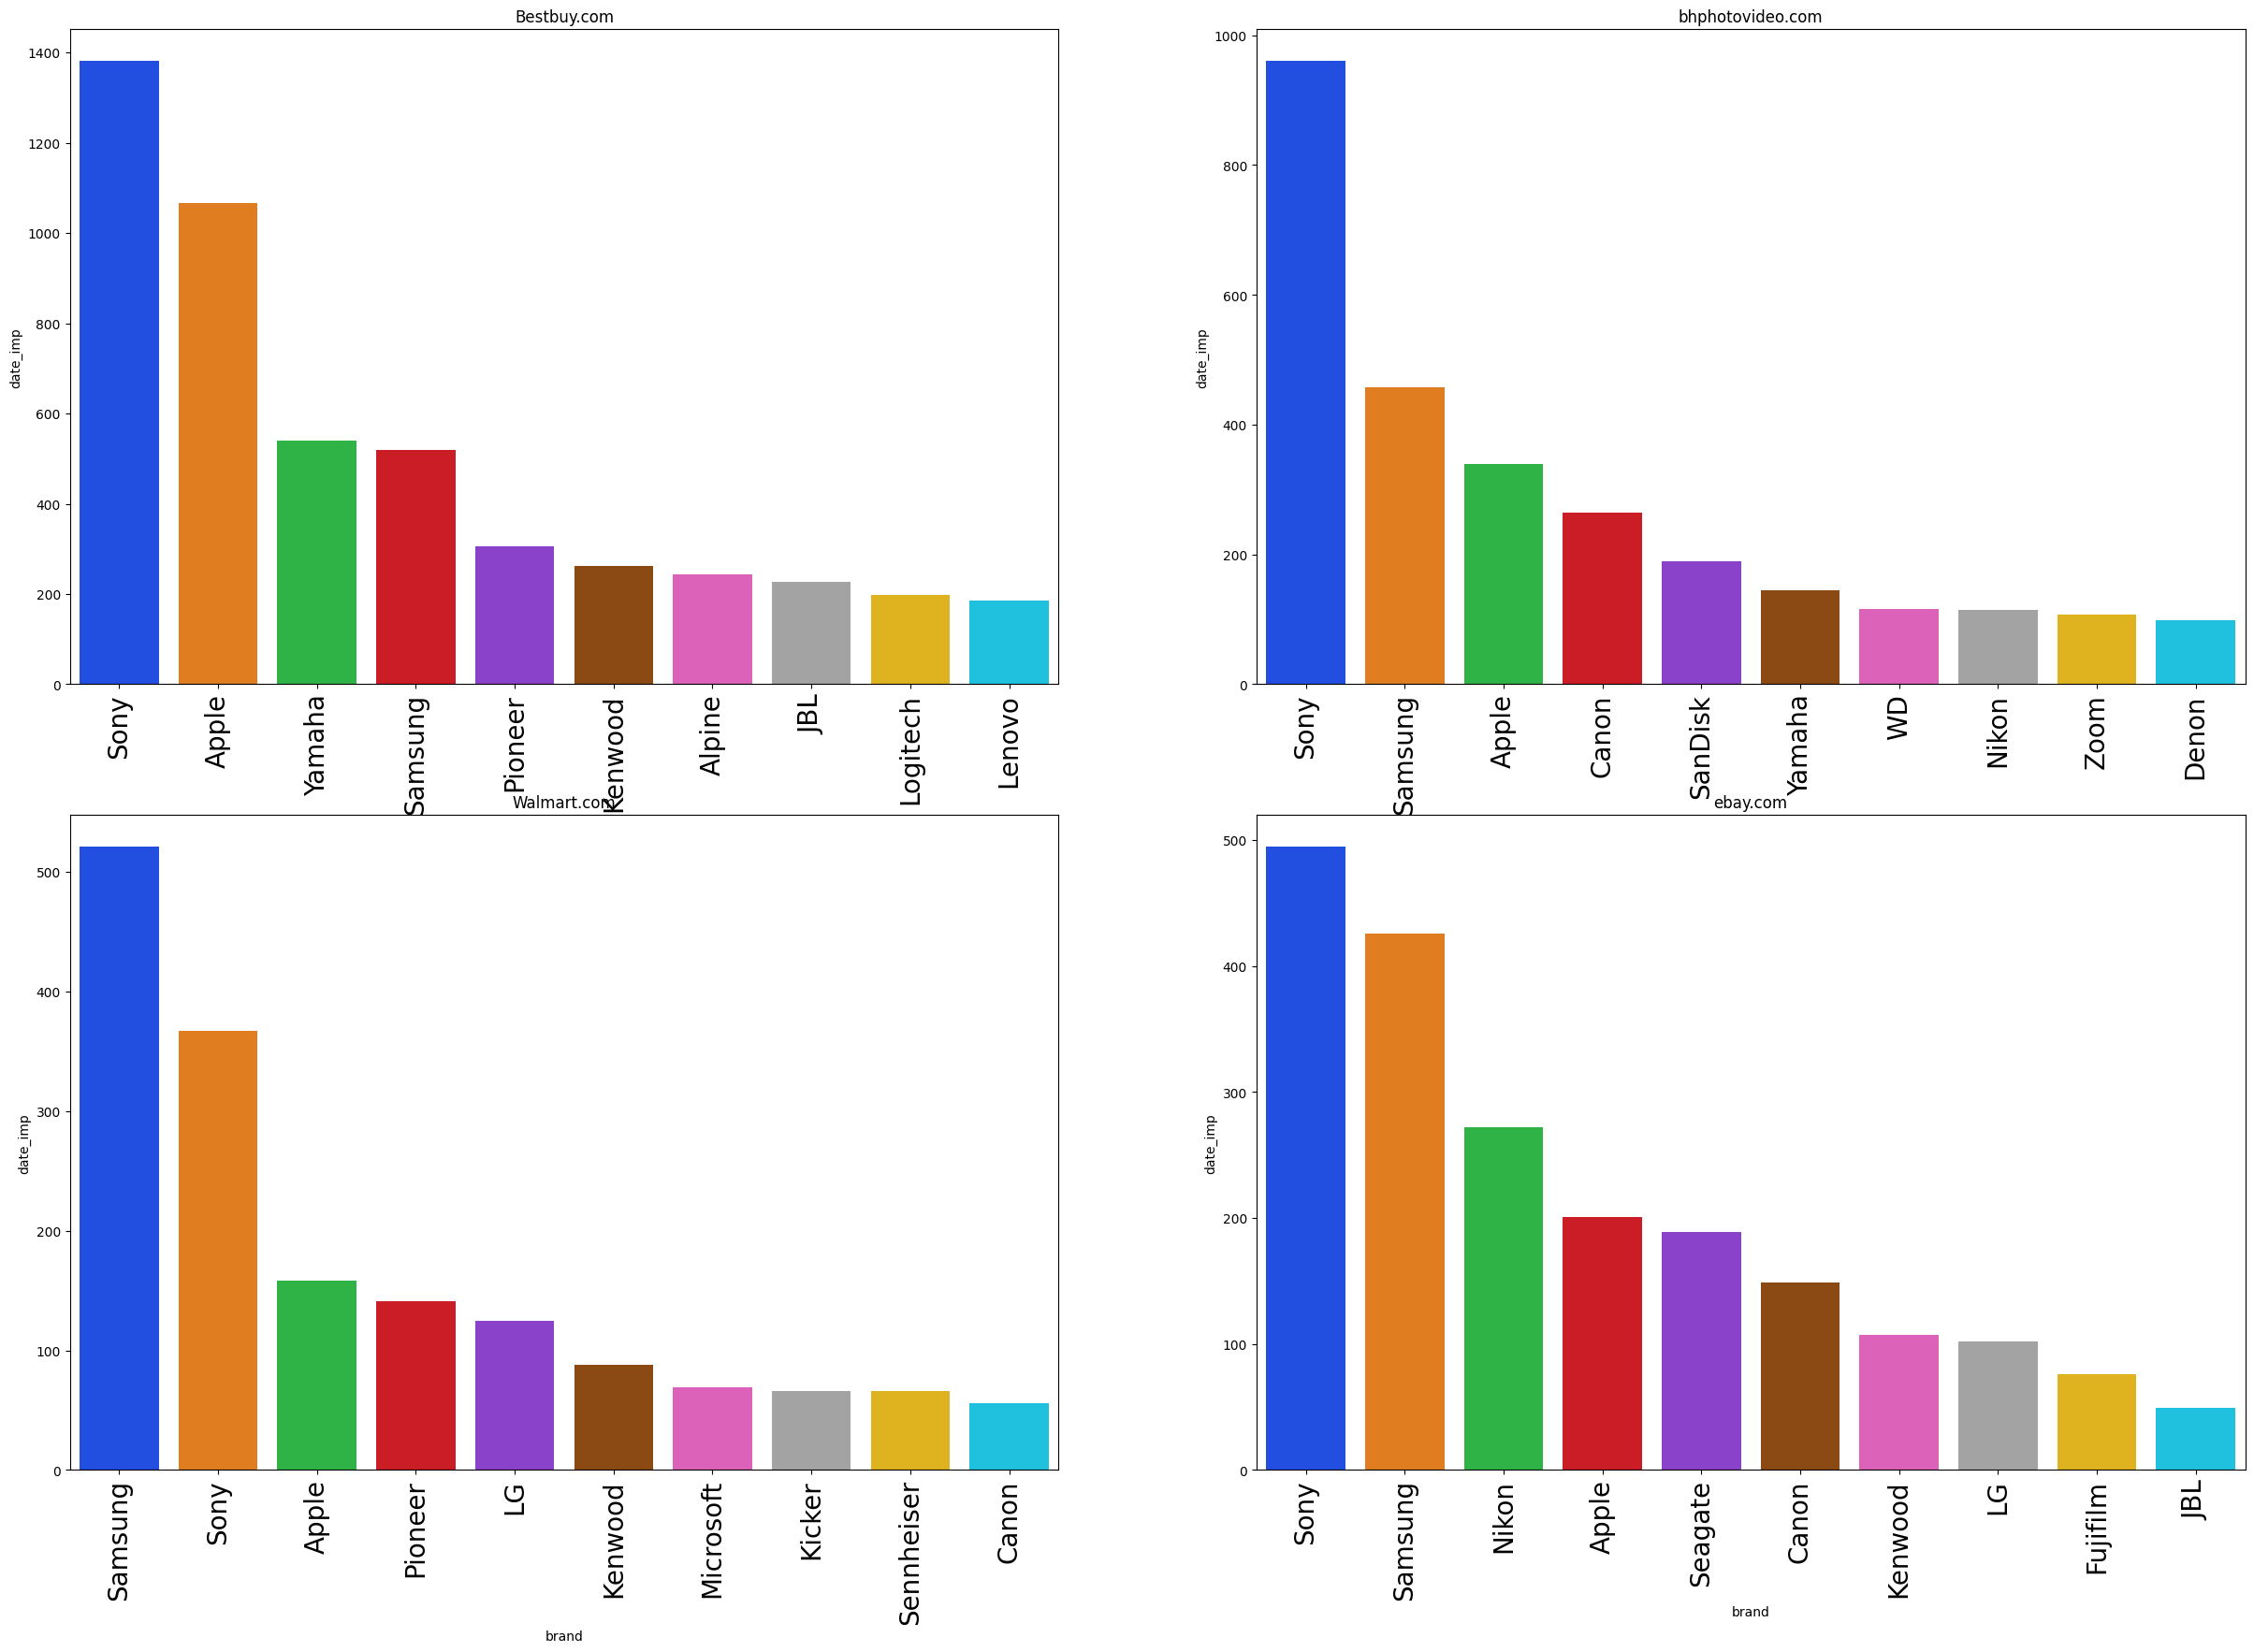

In [129]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux12 = df_best[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux12.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux8 = df_bhp[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux8.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux9 = df_walmart[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux9.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux10 = df_ebay[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux10.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

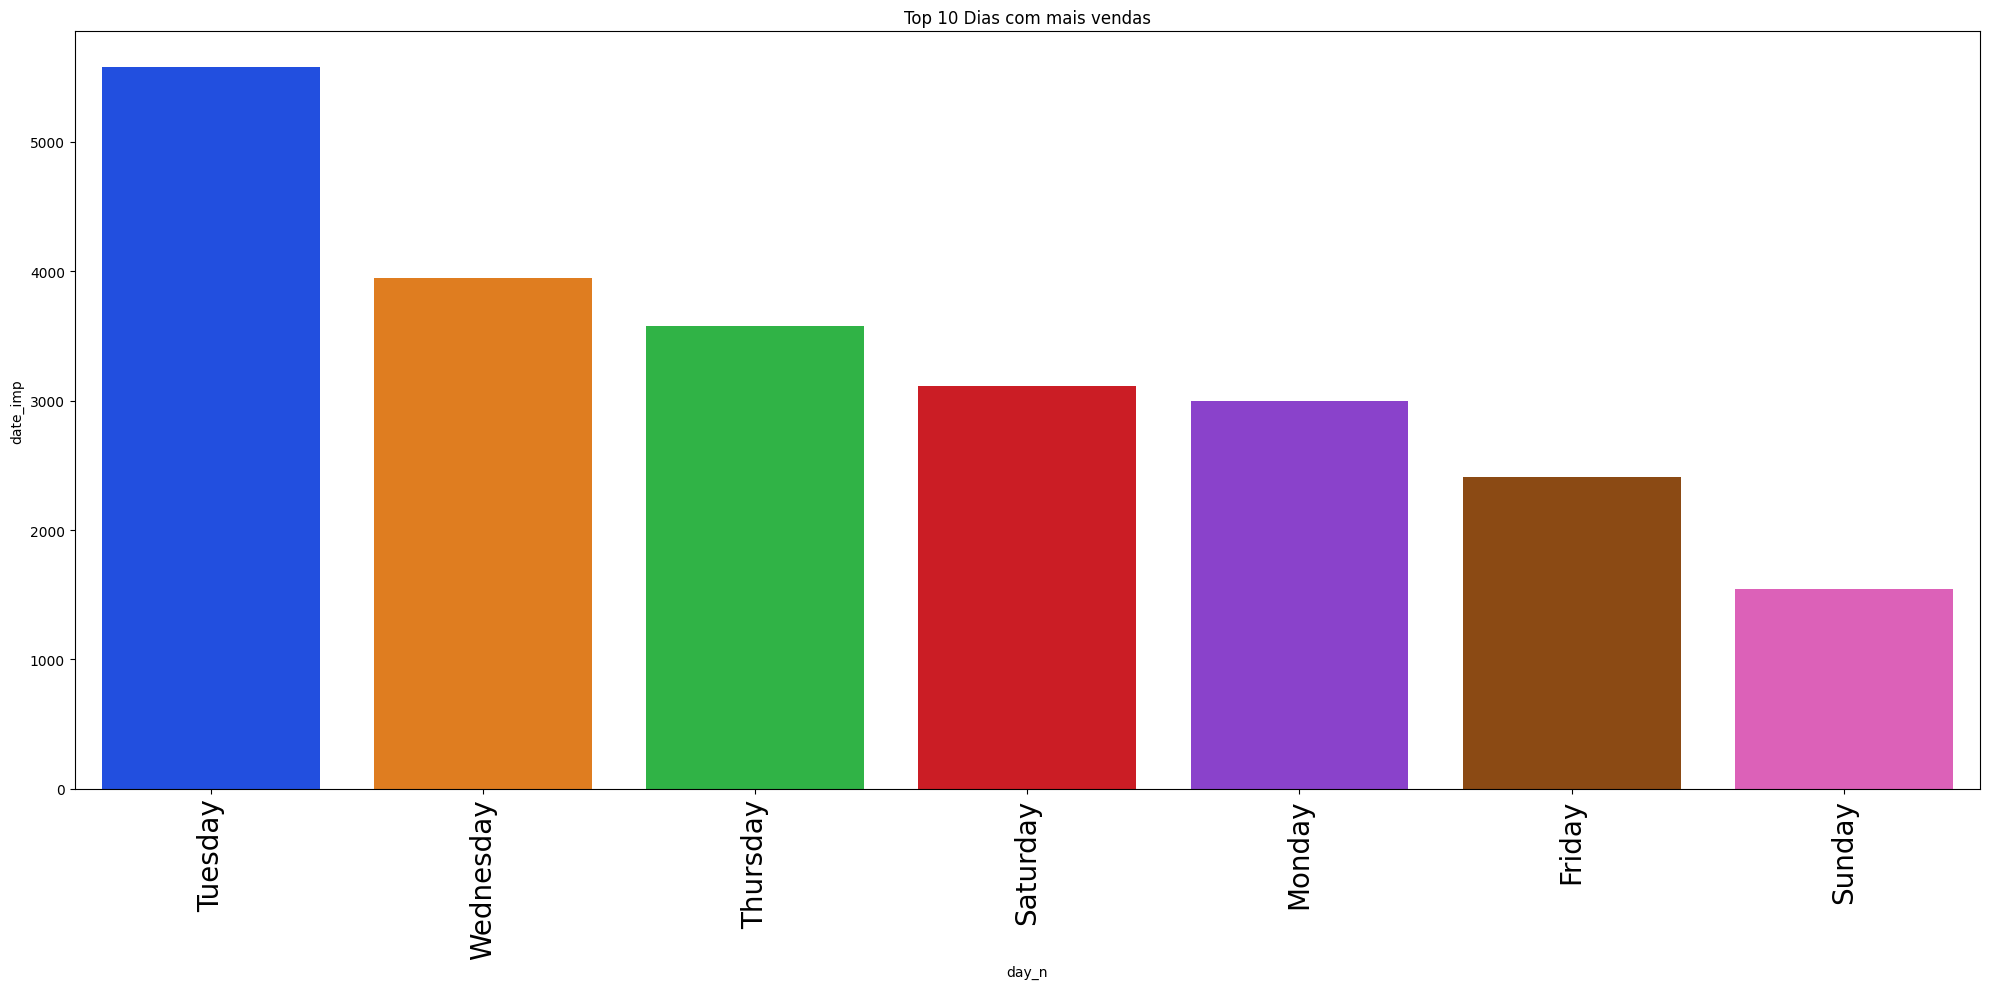

In [130]:
aux13 = df2[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Dias com mais vendas');
sns.barplot(x='day_n', y='date_imp',data=aux13,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.4.2 Quais os dias que mais vendem por loja?

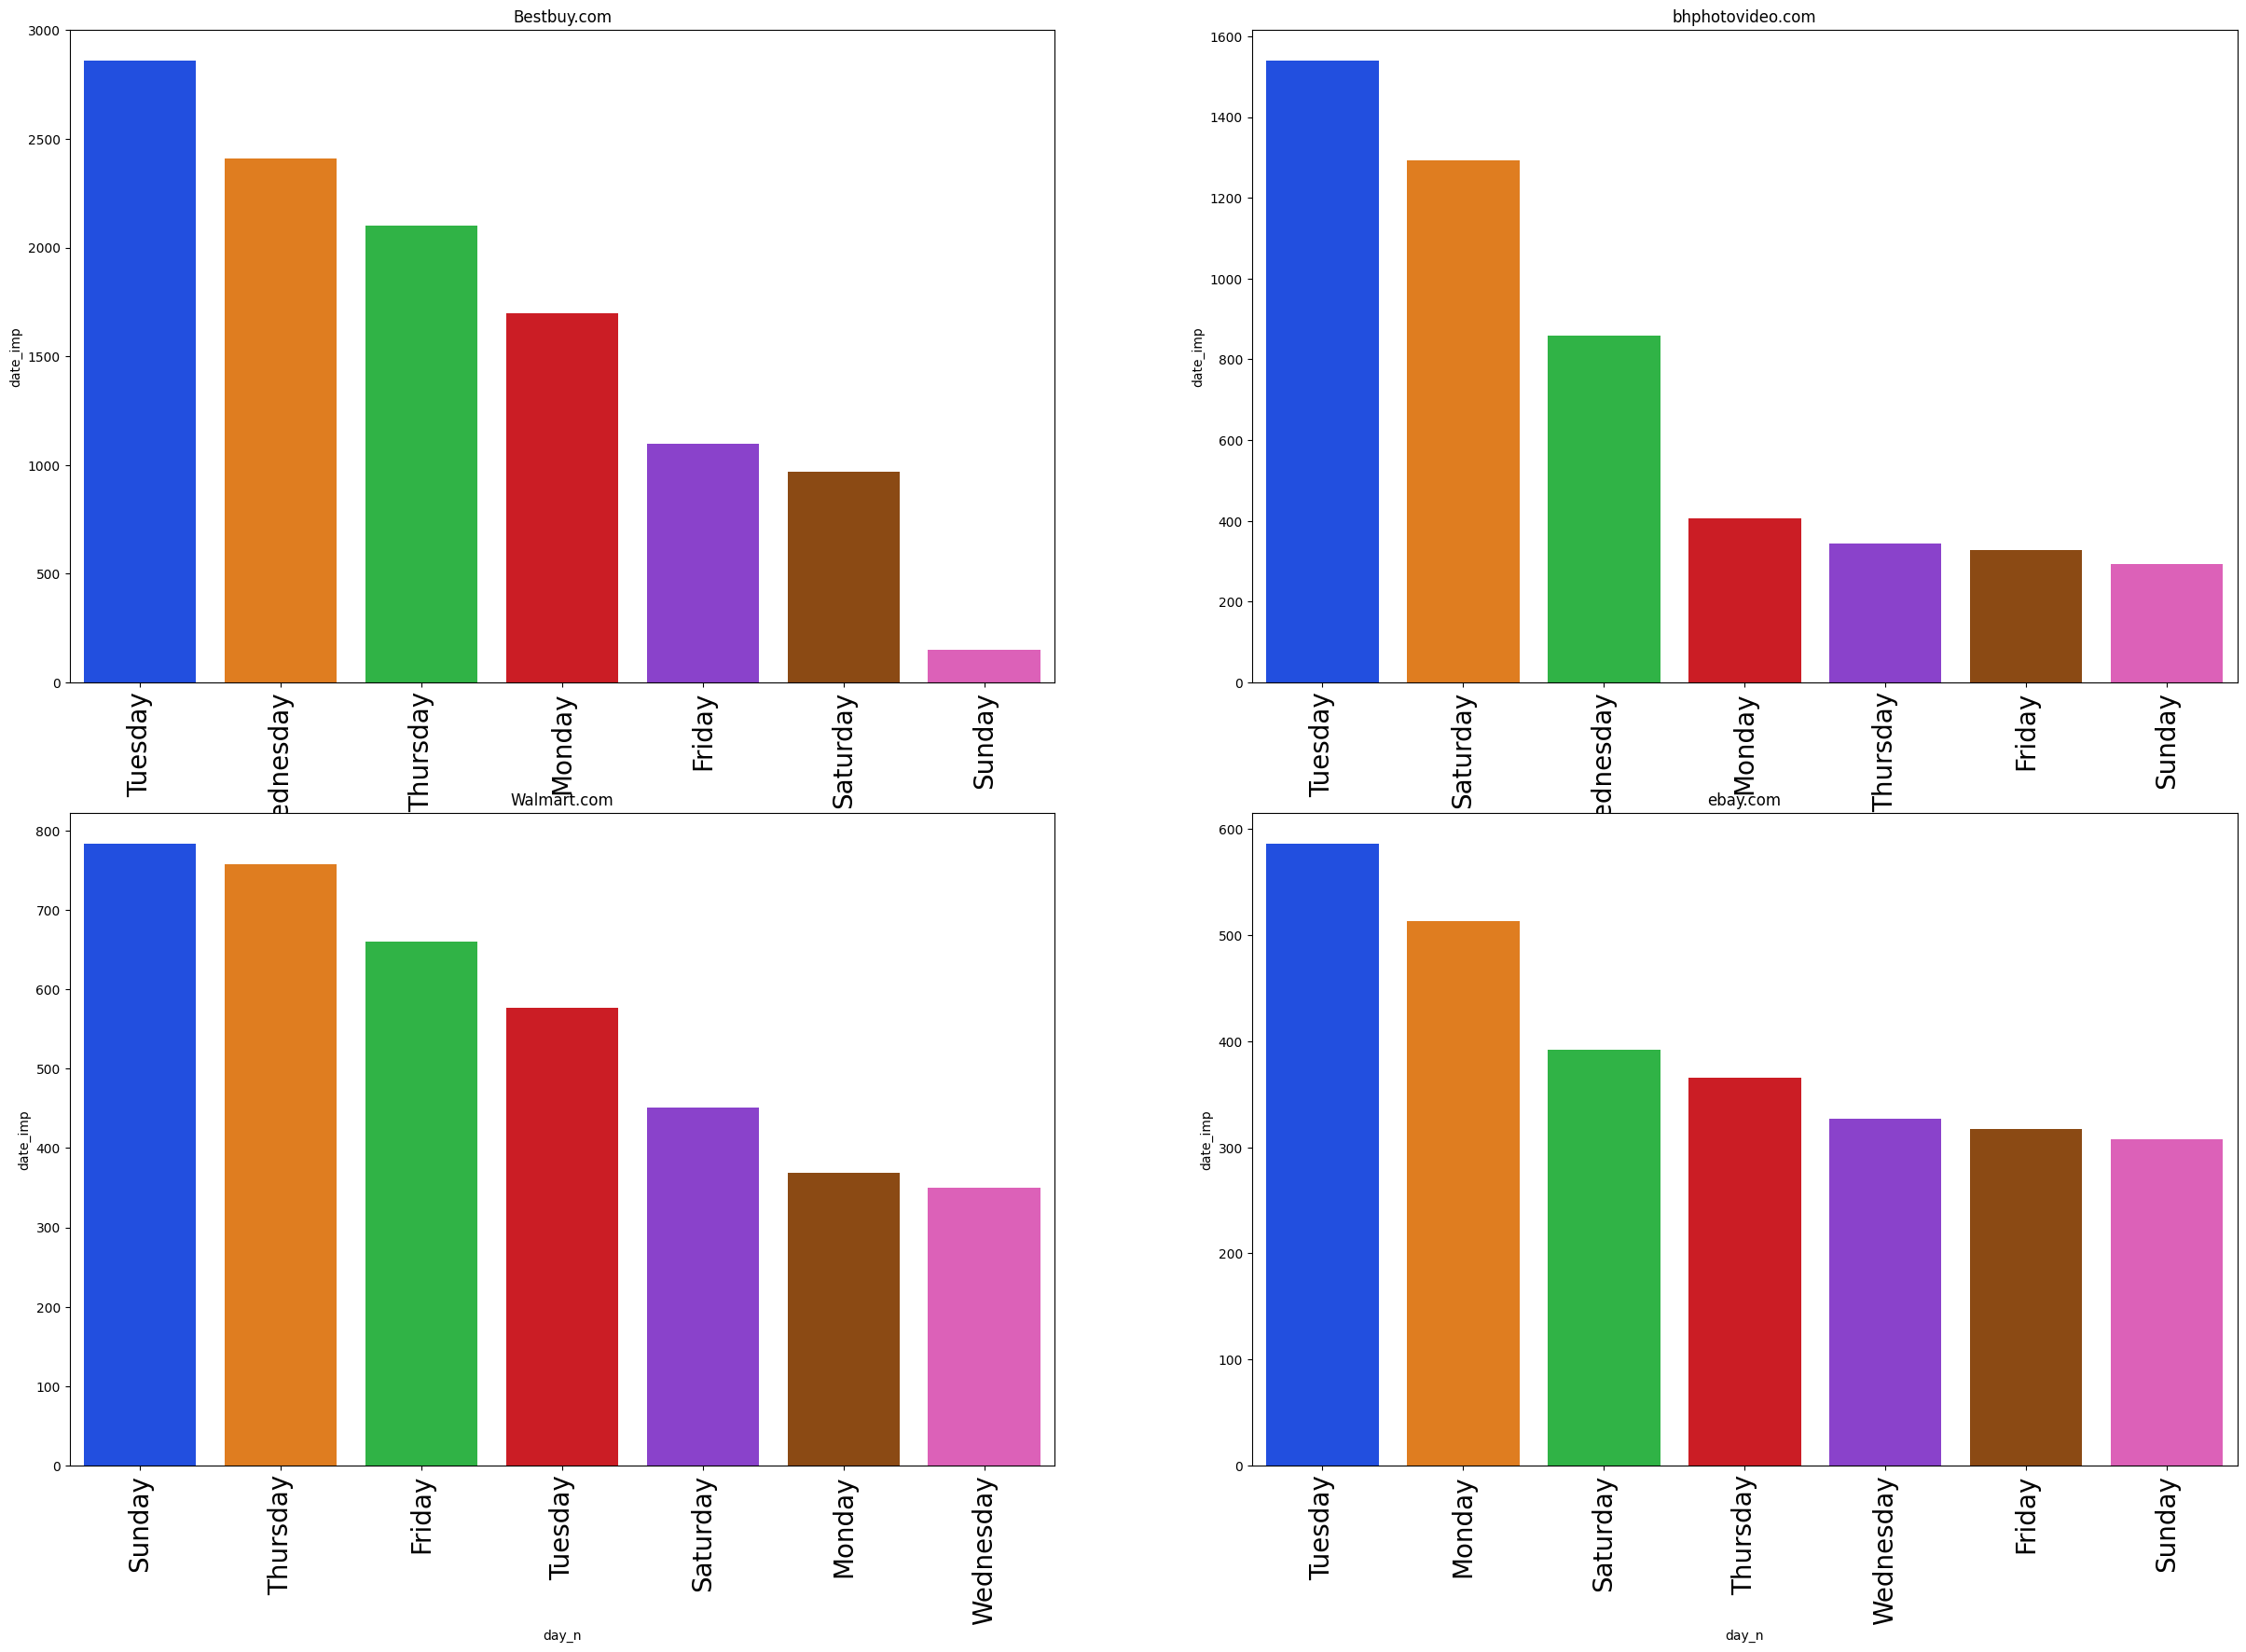

In [131]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux14 = df_best[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux14.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux15 = df_bhp[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux15.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux16 = df_walmart[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux16.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux17 = df_ebay[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux17.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

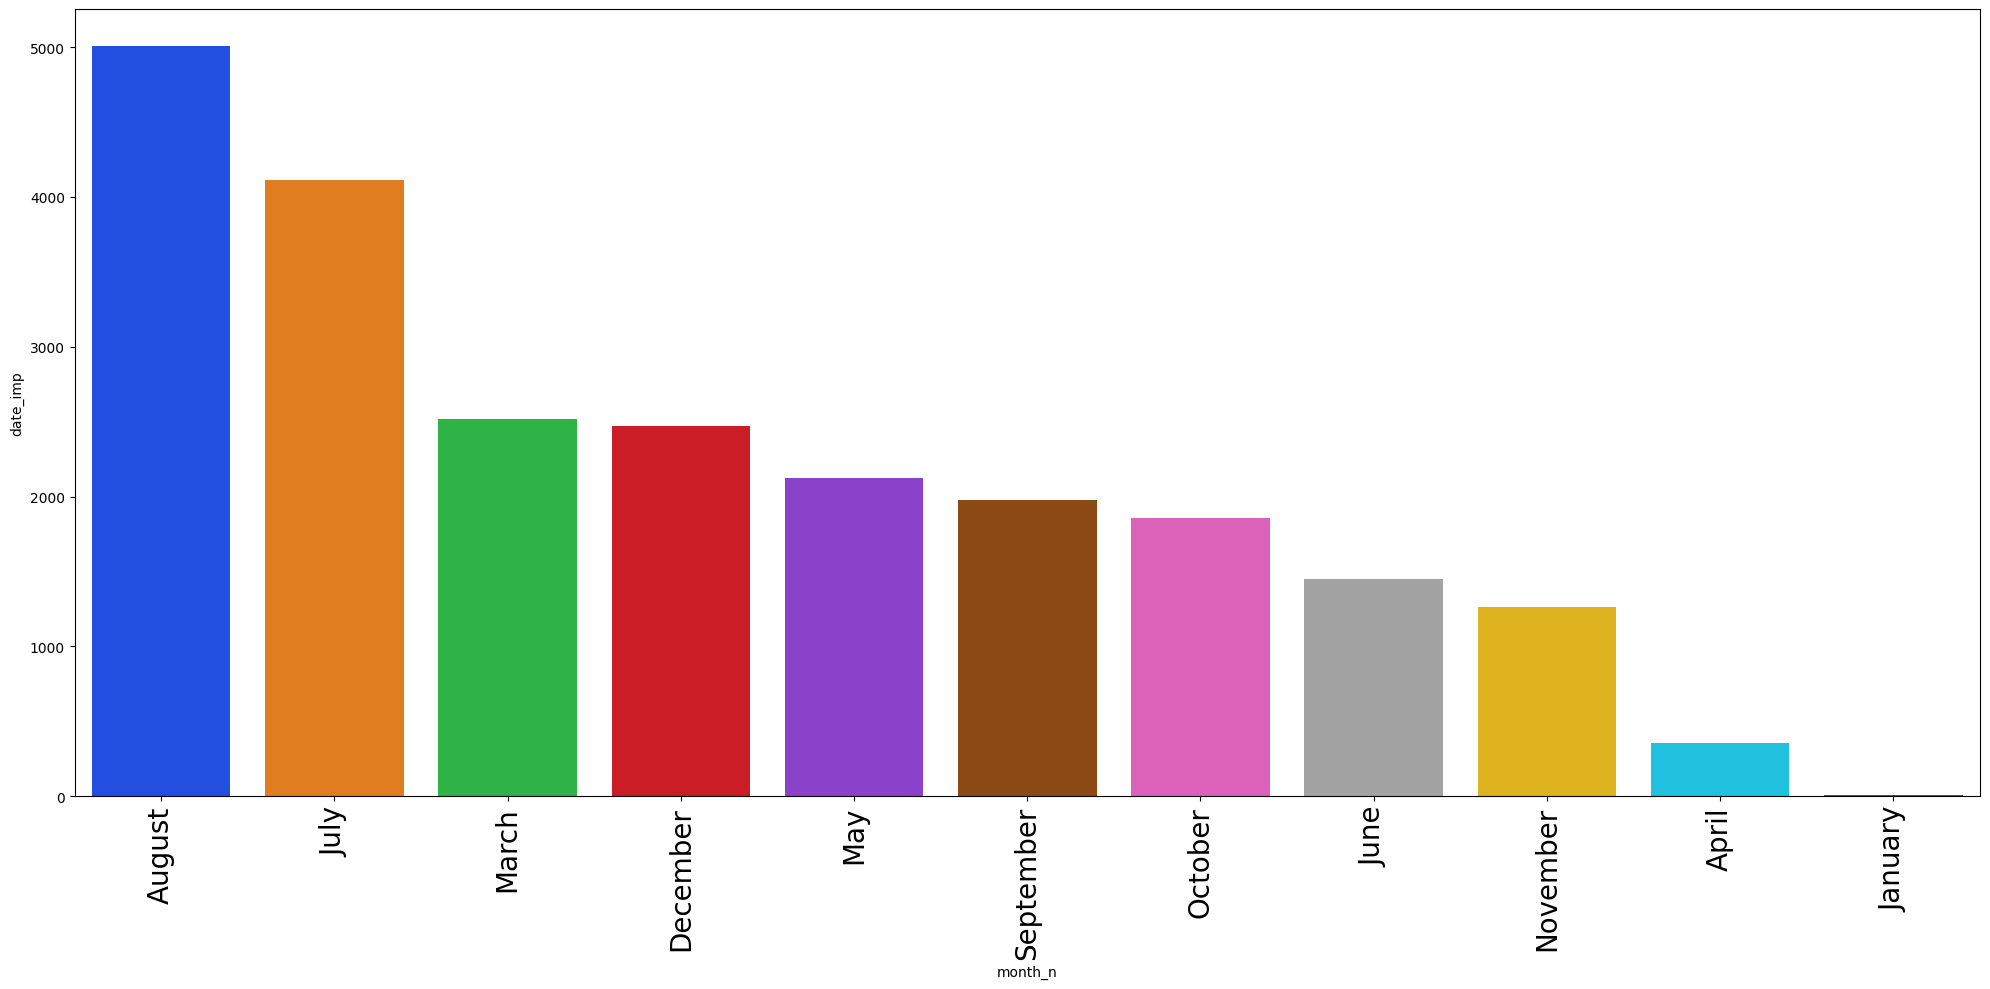

In [132]:
aux18 = df2[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='month_n', y='date_imp',data=aux18,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.5.2 Quais os meses que mais vendem por loja?

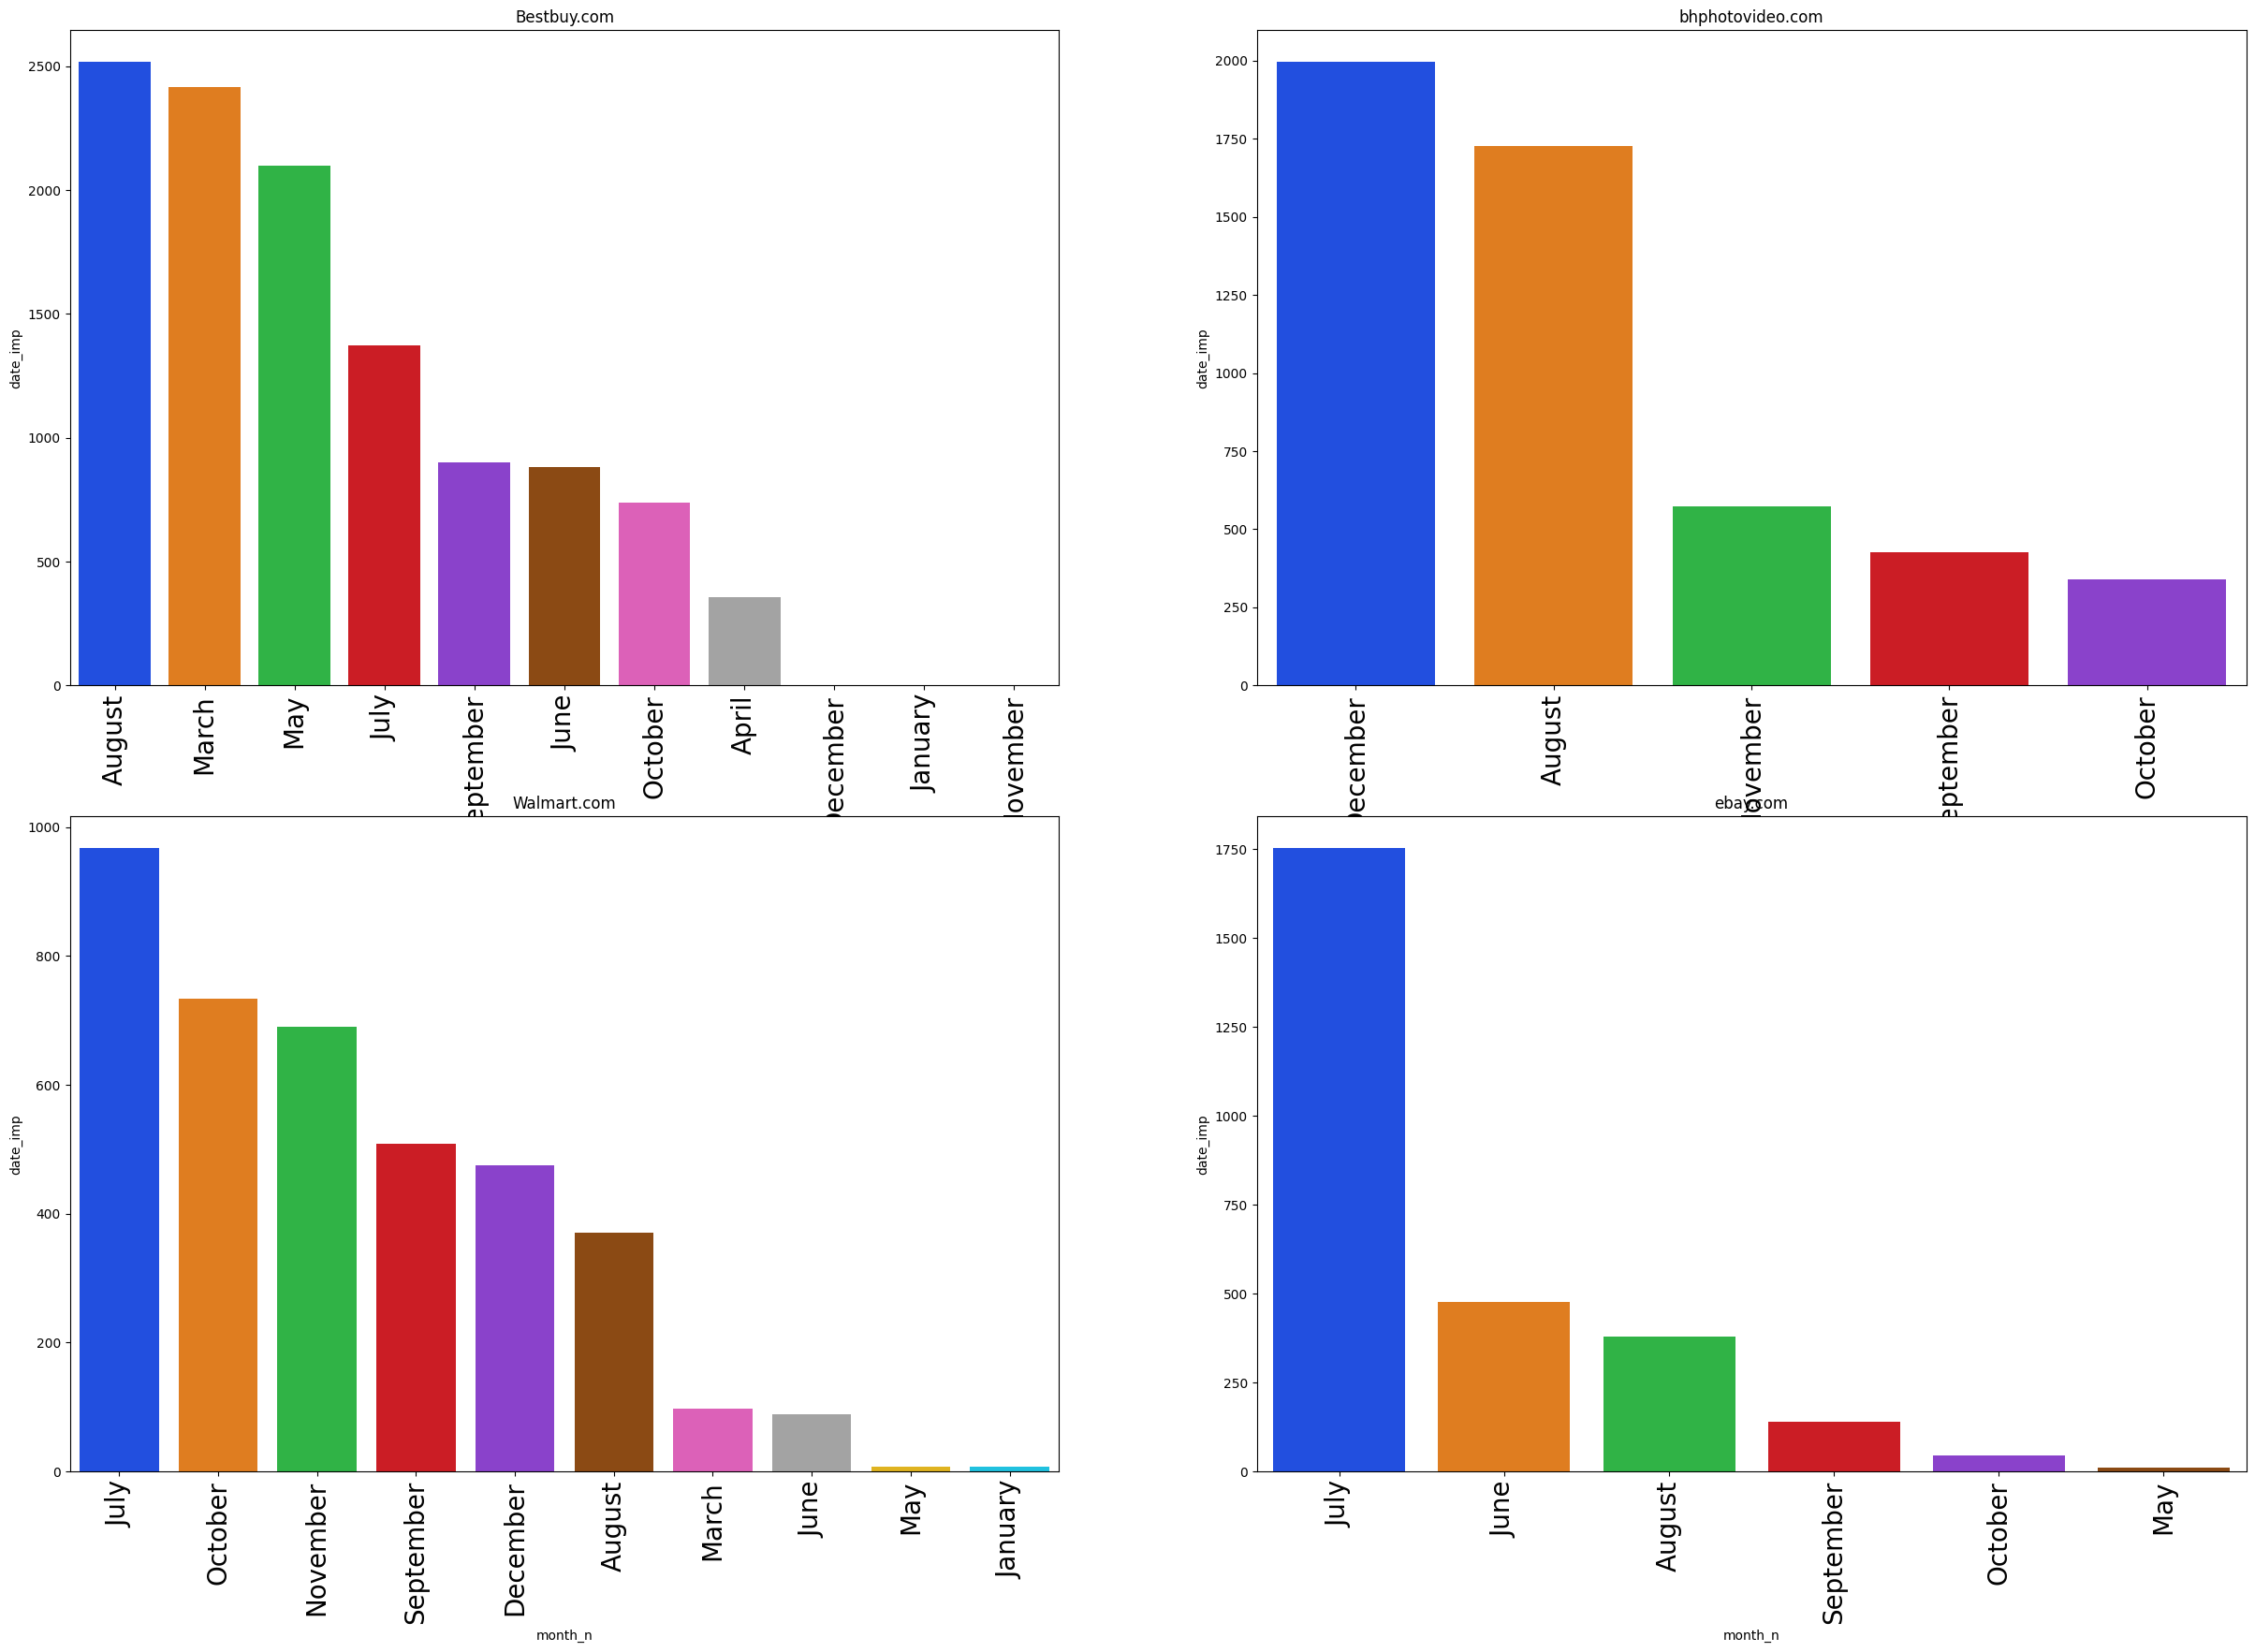

In [133]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux19 = df_best[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux19,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux20 = df_bhp[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux20,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux21 = df_walmart[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux21,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux22 = df_ebay[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux22,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais as semanas que mais vendem no geral?

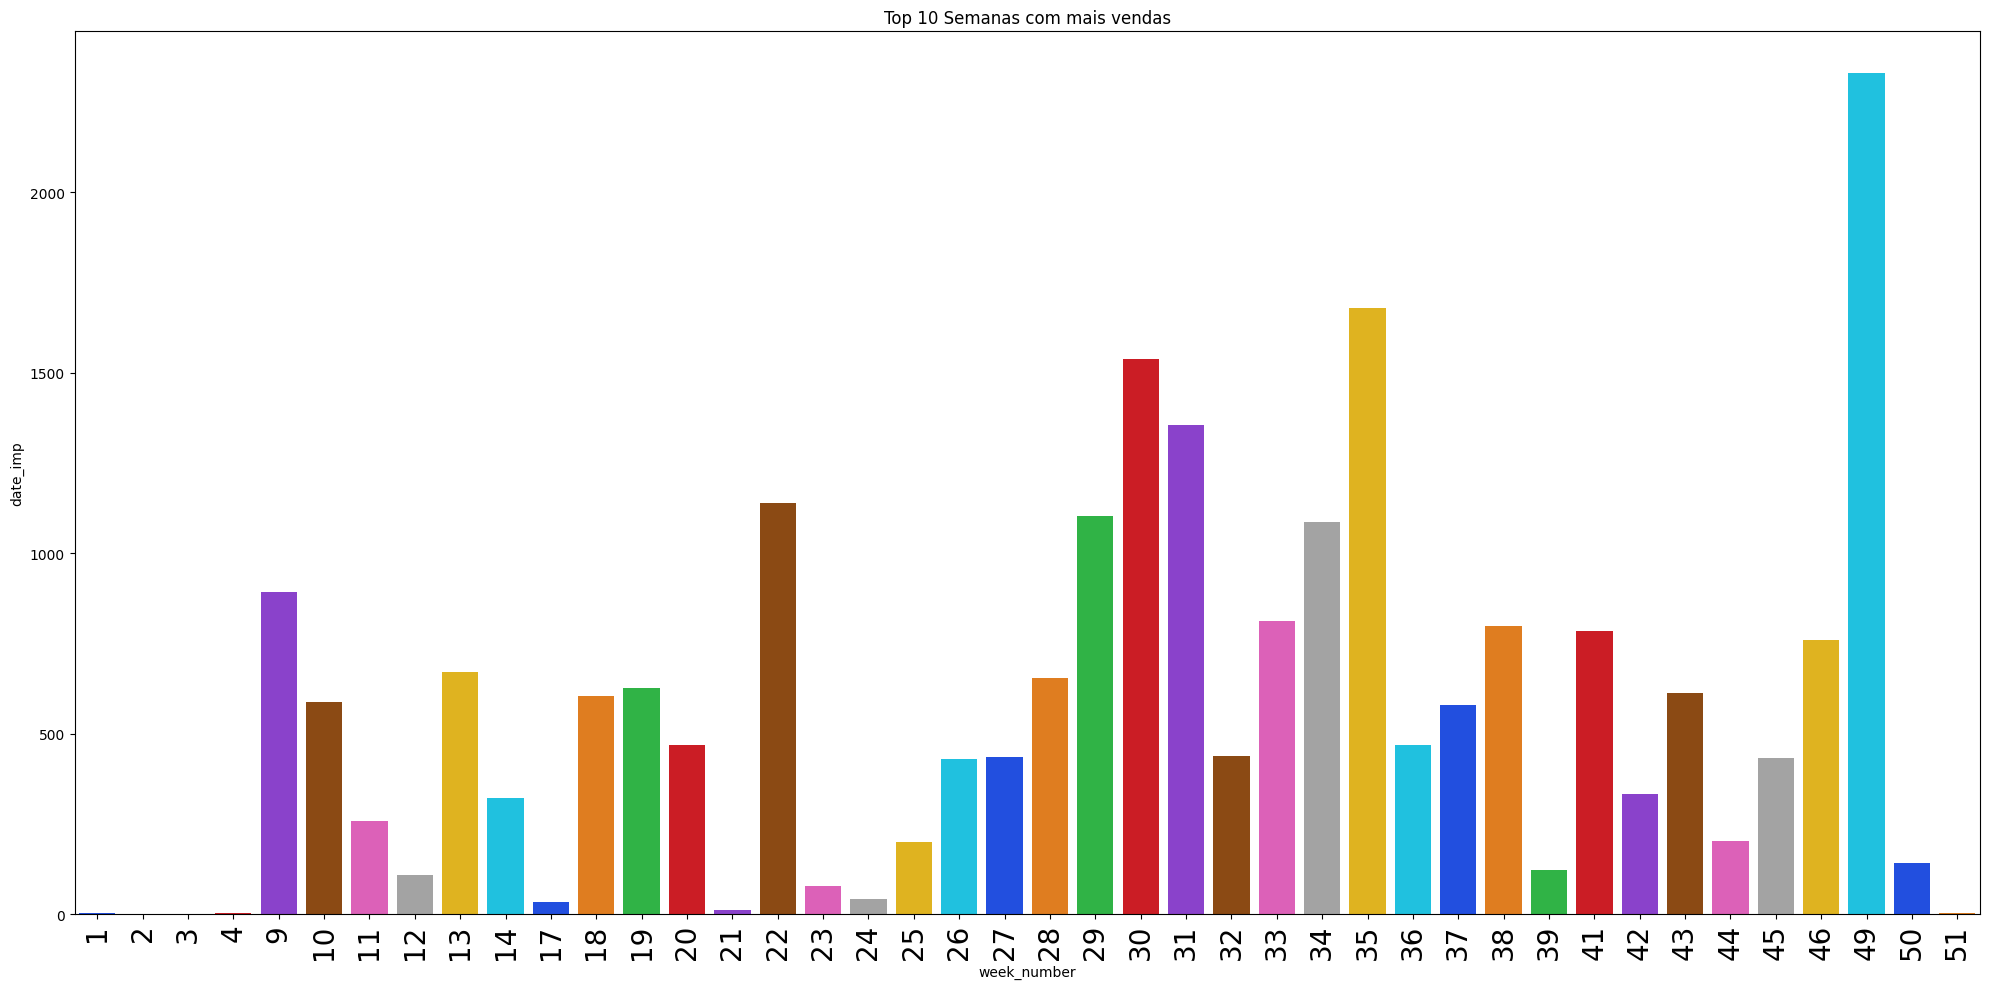

In [134]:
aux23 = df2[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Semanas com mais vendas');
sns.barplot(x='week_number', y='date_imp',data=aux23,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.6.2 Quais as semanas que mais vendem por loja?

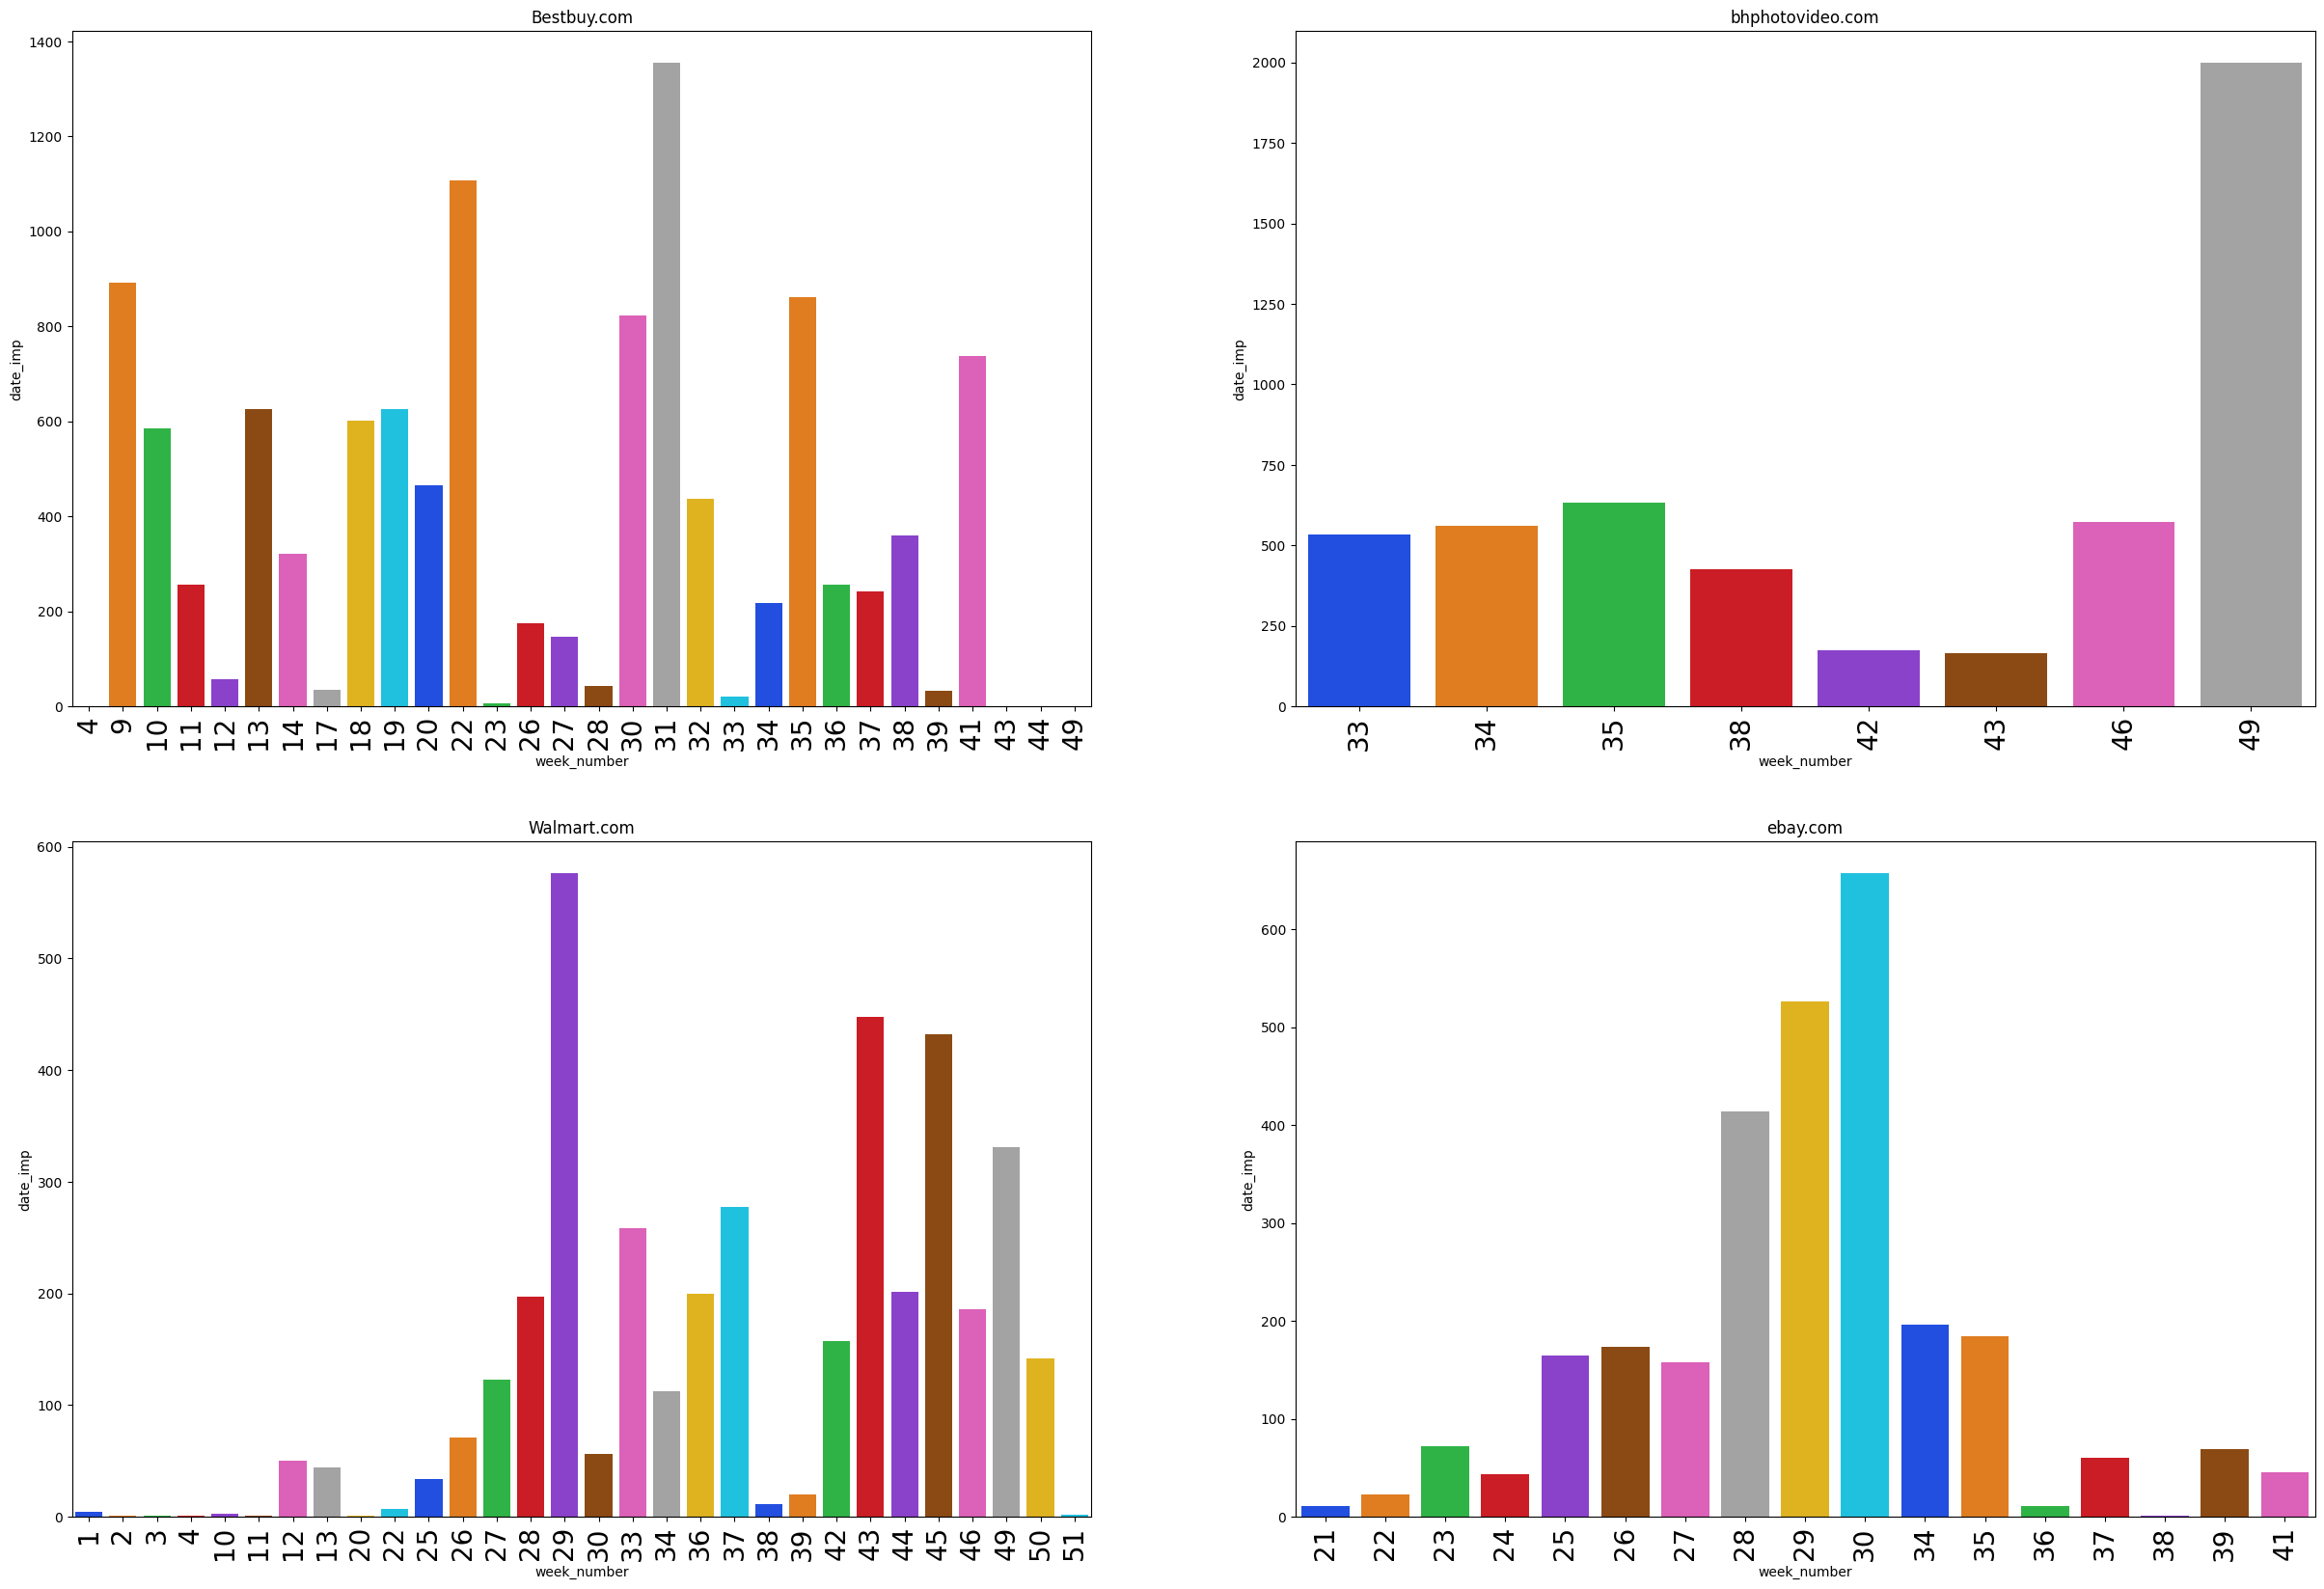

In [135]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux24 = df_best[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux24,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux25 = df_bhp[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux25,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux26 = df_walmart[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux26,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux27 = df_ebay[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux27,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);